## Machine Learning Algorithms 2023
## Homework 1: Python for basic data analysis (80 points)




Name: Conrad, Christian-Ray

Email: conrchri@kean.edu

Kean ID: 001126666

Course: CPS 4802:01


This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset.
### Run each cell and save the results in Google Colab before submission. You will not get points without saving your results.

### Please submit the .ipynb file

![breast image](https://drive.google.com/uc?export=view&id=1uyBwqblsTU0Bnb526F9C4jm2Rtf52r13)

| *Fig. 1. Cell nuclei in a breast histopathology image* |
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|


Tasks:

[Task 1](#section1) (20 points)

[Task 2](#section2) (10 points)

[Task 3](#section3) (20 points)

[Task 4](#section4) (10 points)

[Task 5](#section5) (20 points)

## Dataset

    - Number of data samples: 569
    
    - Each data sample has 30 numeric features/attributes. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        : 212 Malignant (0)
        : 357 Benign (1)
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [26]:
import sklearn.datasets as ds
import numpy as np

In [27]:
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))

print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [28]:
print(type(breast_ds))

<class 'sklearn.utils._bunch.Bunch'>


In [29]:
# we are going to use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10]
tgts = breast_ds.target

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)

#print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)


In [30]:
print(type(ftrs))

<class 'numpy.ndarray'>


### Task 1: Explore the dataset.  20 points <a id = "section1"/>
 - **Question 1 (7.5 points):** count the number of data samples for benign category.
 - **Question 2 (7.5 points):** calculate the the mean feature vectors.
 - **Question 3 (5 points):** plot the mean feature vectors.

In [31]:
## Question 1 (7.5 points)
# count and print out the number of malignant samples (0)
print('Malignant: ', np.sum(tgts==0))
# count and print out the number of benign samples (1)
print('Benign: ', np.sum(tgts==1))

Malignant:  212
Benign:  357


In [32]:
## Question 2 (7.5 points)
# mean of all feature vectors
data = breast_ds.data
all_mean = np.mean(data)
print(all_mean)

# mean of benign feature vectors
b_mean = data[tgts==1]
b_mean = np.mean(b_mean, axis=0)
# mean of malignant feature vectors
m_mean = data[tgts==0]
m_mean = np.mean(m_mean, axis=0)
print('Benign:', b_mean)
print('Malignant: ', m_mean)



61.890712339519624
Benign: [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02 2.84082353e-01 1.22038011e+00
 2.00032129e+00 2.11351485e+01 7.19590196e-03 2.14382465e-02
 2.59967356e-02 9.85765266e-03 2.05838067e-02 3.63605126e-03
 1.33798011e+01 2.35150700e+01 8.70059384e+01 5.58899440e+02
 1.24959496e-01 1.82672549e-01 1.66237723e-01 7.44443445e-02
 2.70245938e-01 7.94420728e-02]
Malignant:  [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02 6.09082547e-01 1.21091462e+00
 4.32392925e+00 7.26724057e+01 6.78009434e-03 3.22811651e-02
 4.18240094e-02 1.50604717e-02 2.04724009e-02 4.06240566e-03
 2.11348113e+01 2.93182075e+01 1.41370330e+02 1.42228632e+03
 1.44845236e-01 3.74824104e-01 4.50605566e-01 1.82237311e-01
 3.23467925e-01 9.15299528e-02]


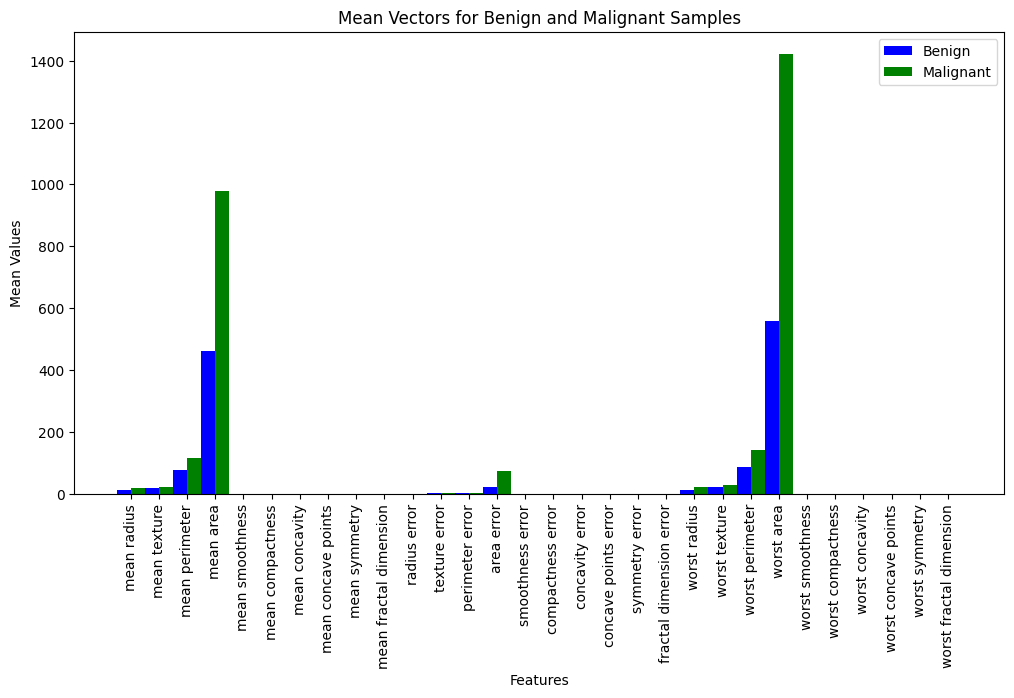

In [33]:
## Question 3 (5 points)
# show bar chart of the mean feature vectors in benign and malignant seperately using matplotlib
from matplotlib import pyplot as plt
featureNames = breast_ds.feature_names

xAxis = np.arange(len(featureNames))

width = 0.5

fig, graph = plt.subplots(figsize=(12, 6))
bar1 = graph.bar(xAxis - width/2, b_mean, width, label='Benign', color='b')
bar2 = graph.bar(xAxis + width/2, m_mean, width, label='Malignant', color='g')

graph.set_xticks(xAxis)
graph.set_xticklabels(featureNames, rotation=90)

graph.set_xlabel('Features')
graph.set_ylabel('Mean Values')
graph.set_title('Mean Vectors for Benign and Malignant Samples')
graph.legend()


### Task 2: Data search. 10 points.  <a id = "section2"/>

**Question:** Let the user input a sample id (0 to 568), and your code will output the feature vector and the corresponding class label of that sample.


In [34]:
# tip: use the input() and print() function
i=input('Enter a sample id: ')
print(breast_ds.data[int(i)])

Enter a sample id: 238
[1.422e+01 2.785e+01 9.255e+01 6.239e+02 8.223e-02 1.039e-01 1.103e-01
 4.408e-02 1.342e-01 6.129e-02 3.354e-01 2.324e+00 2.105e+00 2.996e+01
 6.307e-03 2.845e-02 3.850e-02 1.011e-02 1.185e-02 3.589e-03 1.575e+01
 4.054e+01 1.025e+02 7.640e+02 1.081e-01 2.426e-01 3.064e-01 8.219e-02
 1.890e-01 7.796e-02]


### Task 3.  Study the 'mean area' feature. 20 points  <a id = "section3"/>

mean of benign area:  462.7901960784313
min of benign area:  143.5
max of benign area:  992.1


Text(0.5, 1.0, 'Benign Mean Area')

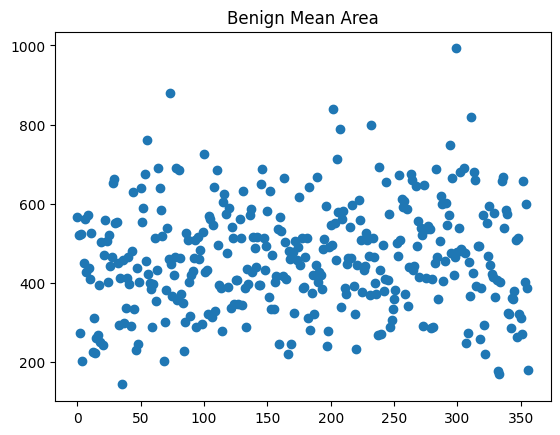

In [35]:
# Question 1 (10 Points): Calculate and print out the mean, min and max values
# of the feature 'mean area (index 3)' for all benign samples.
mean = np.mean(breast_ds.data[tgts==1,3],axis=0)
min = np.min(breast_ds.data[tgts==1,3], axis=0)
max = np.max(breast_ds.data[tgts==1,3], axis=0)
print('mean of benign area: ', mean)
print('min of benign area: ', min)
print('max of benign area: ', max)


# plot the 'mean area (index 3)' features of all benign samples using matplotlib
plt.scatter(range(357), breast_ds.data[tgts==1,3])
plt.title('Benign Mean Area')


mean of benign area:  978.3764150943397
min of benign area:  361.6
max of benign area:  2501.0


Text(0.5, 1.0, 'Malignant Mean Area')

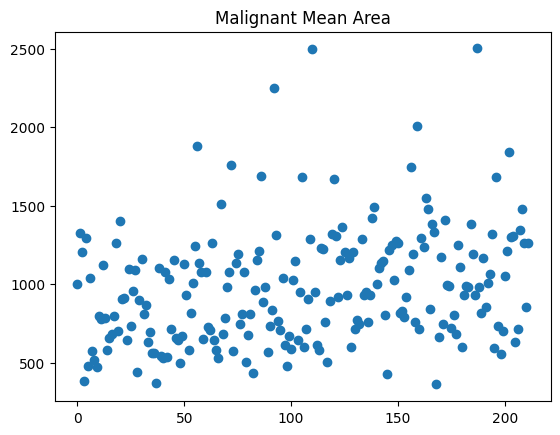

In [36]:
# Question 2 (10 Points): Calculate and print out the mean, min and max values
# of the feature 'mean area (index 3)' for all malignant samples.
mean = np.mean(breast_ds.data[tgts==0,3],axis=0)
min = np.min(breast_ds.data[tgts==0,3], axis=0)
max = np.max(breast_ds.data[tgts==0,3], axis=0)
print('mean of benign area: ', mean)
print('min of benign area: ', min)
print('max of benign area: ', max)

# plot the 'mean area (index 3)' features of all malignant samples
plt.scatter(range(212), breast_ds.data[tgts==0,3])
plt.title('Malignant Mean Area')


### Task 4: Count the number of malignant samples that have 'mean area (index 3)' values less than 400. 10 points  <a id = "section4"/>



In [37]:
count = 0
for i in breast_ds.data[tgts==0,3]:
  if i < 400:
    count += 1
print(count)


3


### Task 5. 20 points <a id = "section5"/>

**Question 1 (10 points):** Define a function that calculates and return the Euclidean distance between any two given data samples

Equation for Euclidean distance between any two given data samples:

$$
Euclidean(a, b) = \sqrt{\sum(a-b)^2}
$$

In [38]:
def Euclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients

        return: d: the distance
    '''

    # write your Euclidean function body here
    eresult = np.sqrt(np.sum(np.square(a-b)))
    return eresult


# test
print('two malignant samples:', Euclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Euclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Euclidean(b_mean, m_mean)) # betwwen means

two malignant samples: 123.08662898837753
two benign samples: 46.35812850705252
between two mean vectors: 1009.1627866986585


**Question 2 (10 points):** Use the Euclidean function defined in Question 1 to compute the **Euclidean distance** between the first feature vector (ftrs[0]) with all other 568 feature vectors (ftrs[1] to ftrs[568]). Save the results in a List. Draw a bar chart to show the results.

Text(0.5, 1.0, 'Euclidean Distance from First Feature Vector')

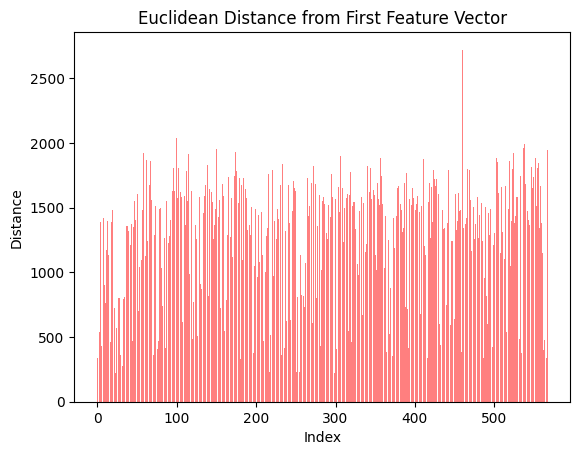

In [39]:
distList = []
feature0 = breast_ds.data[0]
vectors = breast_ds.data[1:]
for i in vectors:
  distList.append(Euclidean(feature0, i))

plt.bar(range(len(distList)), distList, color='red', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Euclidean Distance from First Feature Vector")